In [114]:
%load_ext autoreload
%autoreload 2

import sys
sys.path.insert(0, "../")

%aimport torch


from neuralnetworks.feedforward import Feedforward
from neuralnetworks.base import Module

Tensor = torch.Tensor

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Data generator

In [182]:
import math

from datagenerator.datagenerator import DataGenerator

In [187]:
samples = 10
data_gen = DataGenerator(samples)
# data_gen.generate_data()

In [188]:
data_gen.get_data()

AssertionError: Need to run generate_data() function first

# Linear layer test (forward / backward)

In [18]:
nn = Feedforward(10, 10)

In [19]:
# print("weights:\n", nn.weights)

In [20]:
A = torch.empty(10).normal_()
dA = torch.empty(10).normal_()
# print("A:", A)
# print("dA: ", dA)

In [21]:
# With different inputs
nn.forward(A)
print("weights: \n", nn.weights)
print("Z: \n", nn.Z)
nn.backward(dA)

weights: 
 tensor([[0.6279, 0.8327, 0.5588, 0.1297, 0.7559, 0.6815, 0.2991, 0.9413, 0.2276,
         0.4691],
        [0.9338, 0.9525, 0.7285, 0.7931, 0.1364, 0.8729, 0.7509, 0.9285, 0.8955,
         0.9471],
        [0.6405, 0.6934, 0.3582, 0.1639, 0.4158, 0.1194, 0.4663, 0.0905, 0.7247,
         0.3235],
        [0.6838, 0.5926, 0.4018, 0.4676, 0.5739, 0.2101, 0.6494, 0.0120, 0.6795,
         0.2372],
        [0.1419, 0.6506, 0.2198, 0.6028, 0.3300, 0.7466, 0.8175, 0.9901, 0.1795,
         0.1923],
        [0.3616, 0.2677, 0.6197, 0.0730, 0.8090, 0.6253, 0.2901, 0.1017, 0.9288,
         0.0187],
        [0.4852, 0.7426, 0.7326, 0.1181, 0.9940, 0.4320, 0.9710, 0.0703, 0.1121,
         0.5525],
        [0.1504, 0.1222, 0.4145, 0.0105, 0.0965, 0.7630, 0.4774, 0.7781, 0.7824,
         0.7591],
        [0.4089, 0.8479, 0.1424, 0.4790, 0.7742, 0.3689, 0.5657, 0.6042, 0.1997,
         0.6637],
        [0.8505, 0.7827, 0.5491, 0.3653, 0.2424, 0.1191, 0.9316, 0.3964, 0.9092,
         0.7245]]

In [9]:
# With same input
nn.backward(nn.activation['F'](nn.Z))
nn.activation['F'](nn.Z)
nn.forward(A)

# Linear layer test (forward / backward)

In [36]:
def kaiming(m, h): return torch.empty(m, h).normal_()*math.sqrt(2./m)

In [34]:
def relu(x): return x.clamp_min(0.)

In [46]:
m = 25
h = 25
x = torch.empty(m).normal_()
for i in range(100):
    a = kaiming(m,h)
    x = relu(a @ x)
    
x.mean(), x.std()

(tensor(0.0886), tensor(0.1225))

In [62]:
t = torch.empty(10).zero_()
t

tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

# Multi-layer perceptron

In [86]:
%load_ext autoreload
%autoreload 2

import sys
sys.path.insert(0, "../")

%aimport torch


from neuralnetworks.feedforward import Feedforward
from neuralnetworks.base import Module
from neuralnetworks.functions import tanh

Tensor = torch.Tensor

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [87]:
class MLP(Module):
    def __init__(self, feature_size, output_size, activation='relu'):
        super(MLP, self).__init__()
        self.linear1 = Feedforward(feature_size, 25, activation=activation)
        self.linear2 = Feedforward(25, output_size, activation=activation)

    def forward(self, X: Tensor):
        self.linear1.forward(X)
        x = self.linear1.Z
        self.linear2.forward(x)
        self.output = tanh(self.linear2.Z)

    def backward(self, dA: Tensor):
        self.linear1.backward(dA)
        dx = self.linear1.dA_prev
        self.linear2.backward(dx)
        self.dInput = self.linear2.dA_prev

    def param(self):
        return []

    
#     def parse_loss(self, loss):
#         if loss == 'mse':
#             return mse
#         else:
#             raise Exception("Not implemented loss function")

In [106]:
mlp = MLP(2, 2)

In [107]:
mlp.linear1.weights

tensor([[0.5298, 0.1104, 0.7820, 0.0154, 0.3203, 0.3651, 0.8071, 0.7275, 0.0037,
         0.0840, 0.6551, 0.4432, 0.7526, 0.9686, 0.0861, 0.7777, 0.1912, 0.3995,
         0.4628, 0.3280, 0.1808, 0.3675, 0.6632, 0.8398, 0.8328],
        [0.2076, 0.9587, 0.6717, 0.9680, 0.0419, 0.4510, 0.7710, 0.3594, 0.5347,
         0.3965, 0.3528, 0.0934, 0.3228, 0.9517, 0.0048, 0.2793, 0.9761, 0.9910,
         0.7418, 0.3104, 0.5288, 0.5160, 0.5093, 0.2833, 0.0952]])

In [108]:
mlp.linear2.weights

tensor([[0.8085, 0.1853],
        [0.8141, 0.1032],
        [0.8627, 0.2572],
        [0.6214, 0.2206],
        [0.4371, 0.0503],
        [0.7810, 0.7900],
        [0.8642, 0.0848],
        [0.5225, 0.0936],
        [0.2316, 0.7599],
        [0.4025, 0.1509],
        [0.2942, 0.7754],
        [0.2460, 0.7634],
        [0.9291, 0.0877],
        [0.1181, 0.8052],
        [0.2061, 0.6080],
        [0.8983, 0.4218],
        [0.4680, 0.9891],
        [0.2169, 0.8950],
        [0.4348, 0.4971],
        [0.1922, 0.1819],
        [0.4714, 0.2724],
        [0.1373, 0.2245],
        [0.8909, 0.4083],
        [0.9049, 0.1719],
        [0.6624, 0.1148]])

In [109]:
X = torch.empty(2).normal_()
dloss = torch.empty(2).normal_()

In [110]:
mlp.forward(X)

In [111]:
mlp.output

tensor([1.0000, 0.9996])

In [112]:
mlp.backward(dloss)

In [113]:
mlp.dInput

tensor([0.0005, 0.0010])

# Optimizer

In [190]:
t = torch.empty(10, 2).normal_()

In [191]:
for l in t:
    print(l)

tensor([-0.5778, -1.0430])
tensor([-0.7884,  0.2602])
tensor([-2.1925,  3.0382])
tensor([ 0.2717, -0.0481])
tensor([1.6823, 1.2056])
tensor([-2.1219, -1.6905])
tensor([-0.9607, -1.5023])
tensor([ 0.6692, -1.2856])
tensor([-0.1160, -0.3497])
tensor([-0.6671,  1.0853])


In [29]:
%load_ext autoreload
%autoreload 2

import sys
sys.path.insert(0, "../")

%aimport torch
from torch import nn


from neuralnetworks.base import Module
from neuralnetworks.functions import tanh
from neuralnetworks.mlp import MLP
from datagenerator.datagenerator import DataGenerator

Tensor = torch.Tensor

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [7]:
dg = DataGenerator(10)
dg.generate_data()
X_train, y_train, X_test, y_test = dg.get_data()

In [23]:
list(X_train.shape)

[10, 2]

In [18]:
mlp = MLP(2, 1)

In [19]:
mlp.train(X_train, y_train)

W shape:  torch.Size([2, 25])
dW shape:  torch.Size([10, 10])


RuntimeError: The size of tensor a (25) must match the size of tensor b (10) at non-singleton dimension 1

In [57]:
linear = nn.Linear(2, 2, bias=True)

In [59]:
y = torch.empty(2, 2).normal_()

In [67]:
list(y.shape)

[2, 2]

In [35]:
X = torch.empty(2).normal_()

In [36]:
X

tensor([-2.1139, -0.7914])

In [42]:
linear.forward(X)

tensor([-0.2822,  0.1271], grad_fn=<SqueezeBackward3>)

In [58]:
list(linear.parameters())

[Parameter containing:
 tensor([[ 0.3695, -0.4215],
         [ 0.4669, -0.0503]], requires_grad=True),
 Parameter containing:
 tensor([ 0.7049, -0.1798], requires_grad=True)]

In [46]:
linear.

AttributeError: 'generator' object has no attribute 'next'

# Testing

In [1]:
%load_ext autoreload
%autoreload 2

import sys
sys.path.insert(0, "../")
import math

%aimport torch
from torch import nn
import matplotlib.pyplot as plt


from neuralnetworks.base import Module
from neuralnetworks.functions import one_hot
from neuralnetworks.mlp import MLP
from datagenerator.datagenerator import DataGenerator


Tensor = torch.Tensor

In [2]:
def print_y_vs_yhat(X, y, y_hat):
    fig, axes = plt.subplots(1, 2)
    axes[0].scatter(X[:, 0], X[:, 1], c=y)
    axes[0].set_title("Ground truth")
    axes[1].scatter(X[:, 0], X[:, 1], c=y_hat)
    axes[1].set_title("Predicted")

In [3]:
dg = DataGenerator(1000)
dg.generate_data()
X_train, y_train, X_test, y_test = dg.get_data()

In [4]:
mlp = MLP(2, 2)

In [5]:
mlp.train(X_train, one_hot(y_train, 2), 30)

In [6]:
y_hat = torch.empty_like(y_test)
z = torch.empty_like(X_test)
for i, val in enumerate(X_test):
    
    mlp.forward(val)
    z[i] = mlp.linear3.Z
    y_hat[i] = mlp.output.argmax().item()

In [7]:
print("Z: ", z)

Z:  tensor([[-0.0450, -0.0419],
        [-0.0567, -0.0489],
        [-0.0439, -0.0562],
        ...,
        [-0.0433, -0.0479],
        [-0.0874, -0.0958],
        [-0.0254, -0.0296]])


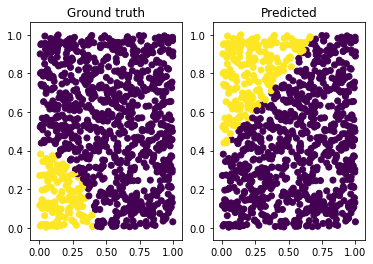

In [9]:
print_y_vs_yhat(X_test, y_test, y_hat)

# Baseline

In [14]:
from keras.models import Sequential
from keras.layers import Dense
from keras.initializers import glorot_normal

In [ ]:
dg = DataGenerator(1000)
dg.generate_data()
X_train, y_train, X_test, y_test = dg.get_data()

In [15]:
init = glorot_normal()
hn = 25
model = Sequential()
model.add(Dense(hn, input_dim=2, activation='relu', kernel_initializer=init))
model.add(Dense(25, activation='relu', kernel_initializer=init))
model.add(Dense(2, activation='sigmoid', kernel_initializer=init))

# model.add(Dense(hn, input_dim=2, activation='relu'))
# model.add(Dense(25, activation='relu'))
# model.add(Dense(2, activation='sigmoid'))

Instructions for updating:
Colocations handled automatically by placer.


In [16]:
model.compile(loss='mean_squared_error', optimizer='sgd', metrics=['accuracy'])

In [19]:
history = model.fit(X_train, one_hot(y_train), validation_data=(X_test, one_hot(y_test)), epochs=50, batch_size=10)

Train on 1000 samples, validate on 1000 samples
Epoch 1/50
1000/1000 [==============================] - 0s 260us/step - loss: 0.0596 - accuracy: 0.9010 - val_loss: 0.0558 - val_accuracy: 0.8990
Epoch 2/50
1000/1000 [==============================] - 0s 288us/step - loss: 0.0592 - accuracy: 0.9030 - val_loss: 0.0553 - val_accuracy: 0.9030
Epoch 3/50
1000/1000 [==============================] - 0s 263us/step - loss: 0.0586 - accuracy: 0.9050 - val_loss: 0.0548 - val_accuracy: 0.9080
Epoch 4/50
1000/1000 [==============================] - 0s 288us/step - loss: 0.0582 - accuracy: 0.9060 - val_loss: 0.0543 - val_accuracy: 0.9090
Epoch 5/50
1000/1000 [==============================] - 0s 278us/step - loss: 0.0577 - accuracy: 0.9070 - val_loss: 0.0538 - val_accuracy: 0.9100
Epoch 6/50
1000/1000 [==============================] - 0s 301us/step - loss: 0.0572 - accuracy: 0.9090 - val_loss: 0.0533 - val_accuracy: 0.9130
Epoch 7/50
1000/1000 [==============================] - 0s 290us/step - loss

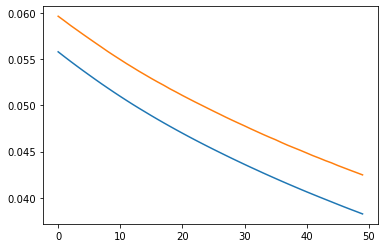

In [20]:
import matplotlib.pyplot as plt
plt.plot(history.history['val_loss'])
plt.plot(history.history['loss'])

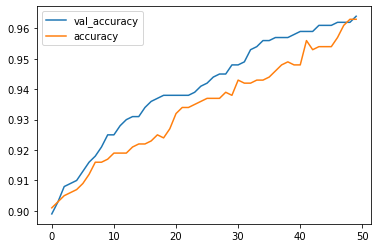

In [21]:
plt.plot(history.history['val_accuracy'])
plt.plot(history.history['accuracy'])
plt.legend(['val_accuracy', 'accuracy'])

In [26]:
y_pred = model.predict(X_test).argmax(axis=1)

Text(0.5, 1.0, 'Predicted')

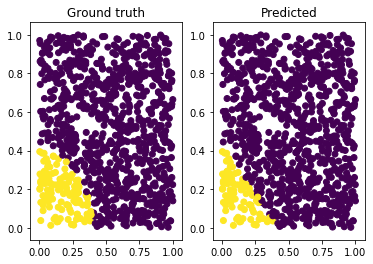

In [29]:
fig, axes = plt.subplots(1, 2)
axes[0].scatter(X_test[:, 0], X_test[:, 1], c=y_test)
axes[0].set_title("Ground truth")
axes[1].scatter(X_test[:, 0], X_test[:, 1], c=y_pred)
axes[1].set_title("Predicted")